In [1]:
import astrodendro
from astrodendro import Dendrogram

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
import astropy.units as u
import regions
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord

# Cloud C

In [2]:
fn_cloudc = '/orange/adamginsburg/jwst/cloudc/alma/member.uid___A001_X1590_X282a.CloudC_sci.spw29.mfs.I.manual.image.pbcor.fits'
hdu_cloudc = fits.open(fn_cloudc)[0]

# Cloud D

In [2]:
fn_cloudd = '/orange/adamginsburg/cmz/dustridge/cloudd/alma/2024.1.00178.S/science_goal.uid___A001_X3788_X85b7/group.uid___A001_X3788_X85b8/member.uid___A001_X3788_X85b9/product/member.uid___A001_X3788_X85b9.CloudD_sci.spw25_27_29_31.cont.I.manual.image.tt0.pbcor.fits'
hdu_cloudd = fits.open(fn_cloudd)[0]

In [3]:
beam_omega_deg2 = (hdu_cloudd.header['BMAJ']*hdu_cloudd.header['BMIN']*np.pi)/(4*np.log(2))
pix_area_deg2 = abs(hdu_cloudd.header['CDELT1']) * abs(hdu_cloudd.header['CDELT2'])
mpix = beam_omega_deg2/pix_area_deg2

In [4]:
reg = regions.RectangleSkyRegion(center=WCS(hdu_cloudd.header).celestial.pixel_to_world(3000, 2000), width=0.015*u.deg, height=0.015*u.deg)
center_noise = WCS(hdu_cloudd.header).celestial.pixel_to_world(4000, 4000)
reg_noise = regions.RectangleSkyRegion(center=center_noise, width=0.015*u.deg, height=0.015*u.deg)

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [5]:
cutout_cloudd = Cutout2D(hdu_cloudd.data[0,0], position=reg.center, size=(0.015*u.deg,0.015*u.deg), wcs=WCS(hdu_cloudd.header).celestial)
cutout_cloudd_noise = Cutout2D(hdu_cloudd.data[0,0], position=center_noise, size=(0.015*u.deg,0.015*u.deg), wcs=WCS(hdu_cloudd.header).celestial)

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


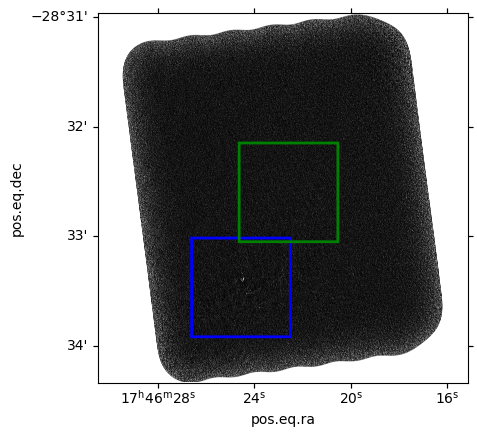

In [6]:
ax = plt.subplot(projection=WCS(hdu_cloudd.header).celestial)
ax.imshow(hdu_cloudd.data[0,0], origin='lower', cmap='gray', vmin=0, vmax=np.nanpercentile(hdu_cloudd.data, 99))
#p.plot_contour(ax, color='red', structure=0)
reg.to_pixel(WCS(hdu_cloudd.header).celestial).plot(ax=ax, edgecolor='blue', facecolor='none', lw=2)
reg_noise.to_pixel(WCS(hdu_cloudd.header).celestial).plot(ax=ax, edgecolor='green', facecolor='none', lw=2)

In [ ]:
#d_cutout = Dendrogram.compute(cutout_cloudd.data, min_value=3*np.nanstd(cutout_cloudd_noise.data), min_npix=int(mpix), wcs=cutout_cloudd.wcs, min_delta=0.7*np.nanstd(cutout_cloudd_noise.data)) 

In [ ]:
#d_cutout.save_to('/blue/adamginsburg/adamginsburg/jwst/cloudc/dustridge-cd/dendro/dendro_cloudd_cutout.fits')
d_cutout = Dendrogram.load_from('/blue/adamginsburg/adamginsburg/jwst/cloudc/dustridge-cd/dendro/dendro_cloudd_cutout.fits')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [17]:
d_cutout.trunk

[<Structure type=leaf idx=0>,
 <Structure type=leaf idx=1>,
 <Structure type=leaf idx=2>,
 <Structure type=leaf idx=3>,
 <Structure type=leaf idx=4>,
 <Structure type=leaf idx=5>]

In [14]:
p_cutout = d_cutout.plotter()

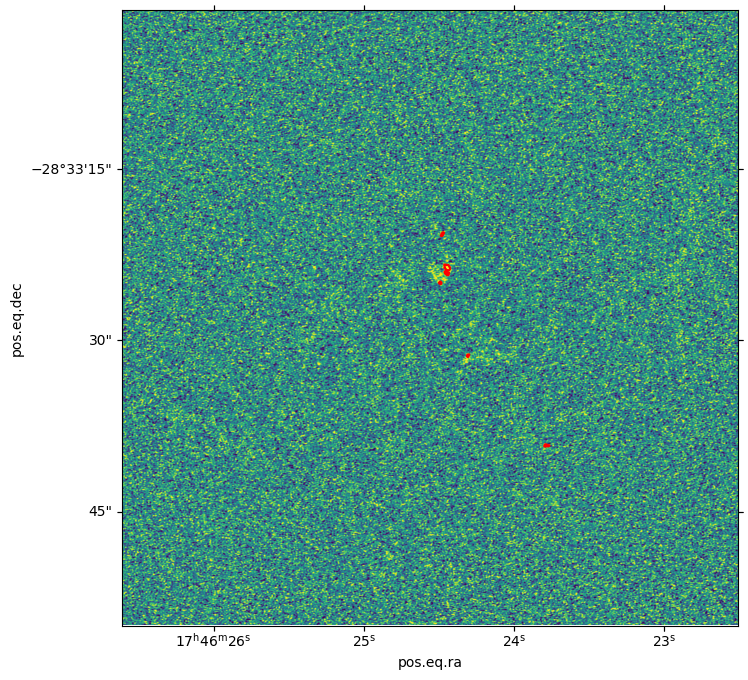

In [61]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(projection=cutout_cloudd.wcs)
ax.imshow(cutout_cloudd.data, origin='lower', cmap='viridis', vmin=np.nanpercentile(cutout_cloudd.data, 1), vmax=np.nanpercentile(cutout_cloudd.data, 99))
for s in d_cutout.trunk:
    p_cutout.plot_contour(ax, structure=s, colors='red')
#p_cutout.plot_contour(ax, structure=3, colors='red') # 4, 2, 3

In [44]:
from astrodendro.analysis import PPStatistic
meta_cloudd = {}
meta_cloudd['data_unit'] = u.Jy/u.beam #hdu_cloudd.header['BUNIT']
meta_cloudd['spatial_scale'] = (proj_plane_pixel_scales(cutout_cloudd.wcs)[0]*u.deg).to(u.arcsec)  # arcsec/pixel
meta_cloudd['beam_major'] = (hdu_cloudd.header['BMAJ']*u.deg).to(u.arcsec)  # arcsec
meta_cloudd['beam_minor'] = (hdu_cloudd.header['BMIN']*u.deg).to(u.arcsec)  # arcsec
meta_cloudd['wcs'] = cutout_cloudd.wcs

stat_4 = PPStatistic(d_cutout.trunk[4], metadata=meta_cloudd)

In [45]:
stat_4.x_cen, stat_4.y_cen
stat4_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (266.61798916, -28.56350962)>

In [46]:
#stat_4.x_cen, stat_4.y_cen, stat_4.flux
stat4_coord = SkyCoord(stat_4.x_cen, stat_4.y_cen, unit='deg')

cutout_4 = Cutout2D(cutout_cloudd.data, position=stat4_coord, size=(10*u.arcsec, 10*u.arcsec), wcs=cutout_cloudd.wcs)

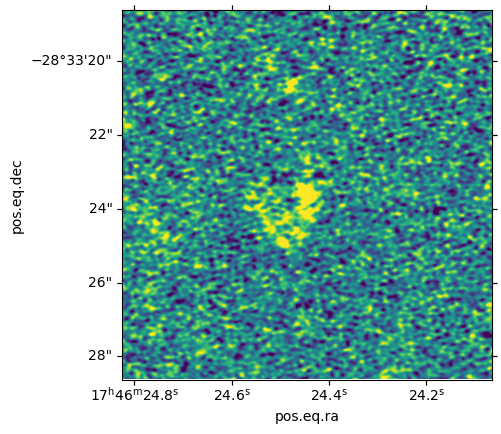

In [48]:
ax = plt.subplot(projection=cutout_4.wcs)
ax.imshow(cutout_4.data, origin='lower', cmap='viridis', vmin=np.nanpercentile(cutout_4.data, 1), vmax=np.nanpercentile(cutout_4.data, 99))

In [ ]:
# 4, 2, 3
# sigma = np.nanstd(cutout_cloudd_noise.data)

In [58]:
d_cutout.trunk[4].get_peak()[1] / np.nanstd(cutout_cloudd_noise.data)

11.999106310828921

In [59]:
d_cutout.trunk[3].get_peak()[1] / np.nanstd(cutout_cloudd_noise.data)

5.74465431051364

In [60]:
d_cutout.trunk[2].get_peak()[1] / np.nanstd(cutout_cloudd_noise.data)

5.04288582020237

# Filament

In [2]:
fn_filament = '/orange/adamginsburg/cmz/dustridge/filament/2024.1.00178.S/science_goal.uid___A001_X3788_X85bb/group.uid___A001_X3788_X85bc/member.uid___A001_X3788_X85bd/product/member.uid___A001_X3788_X85bd.Filament_sci.spw25_27_29_31.mfs.I.manual.image.pbcor.fits'
hdu_filament = fits.open(fn_filament)[0]

In [3]:
beam_omega_deg2 = (hdu_filament.header['BMAJ']*hdu_filament.header['BMIN']*np.pi)/(4*np.log(2))
pix_area_deg2 = abs(hdu_filament.header['CDELT1']) * abs(hdu_filament.header['CDELT2'])
mpix_filament = beam_omega_deg2/pix_area_deg2

In [4]:
reg_filanoise = regions.RectangleSkyRegion(center=WCS(hdu_filament.header).celestial.pixel_to_world(3500, 3500), width=0.01*u.deg, height=0.01*u.deg)
cutout_filanoise = Cutout2D(hdu_filament.data[0,0], position=reg_filanoise.center, size=(0.01*u.deg,0.01*u.deg), wcs=WCS(hdu_filament.header).celestial)

reg_filament = regions.RectangleSkyRegion(center=WCS(hdu_filament.header).celestial.pixel_to_world(2750, 3000), width=0.035*u.deg, height=0.041*u.deg, angle=7.5*u.deg)

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [5]:
ww_filament = WCS(hdu_filament.header).celestial
mask_filament = reg_filament.to_pixel(ww_filament).to_mask()
data_filament = mask_filament.multiply(hdu_filament.data[0,0])
data_filament[data_filament == 0] = np.nan  # set pixels outside the region to NaN
slc_lg, slc_sm = mask_filament.get_overlap_slices(hdu_filament.data[0,0].shape)
ww_sl = ww_filament[slc_lg]
wcs_filament = ww_sl

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


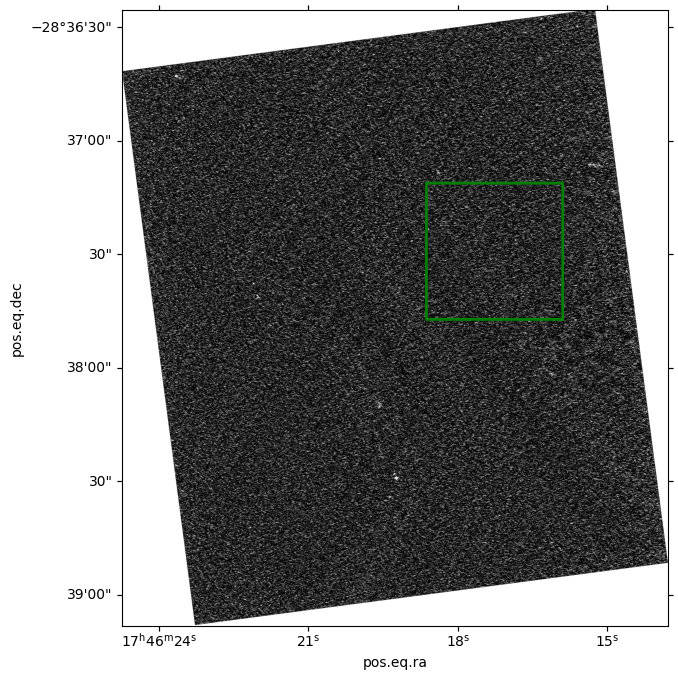

In [6]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(projection=wcs_filament)
ax.imshow(data_filament, origin='lower', cmap='gray', vmin=0, vmax=np.nanpercentile(data_filament, 99))
reg_filanoise.to_pixel(wcs_filament).plot(ax=ax, edgecolor='green', facecolor='none', lw=2)

#reg_filament.to_pixel(wcs_filament).plot(ax=ax, edgecolor='blue', facecolor='none', lw=2)

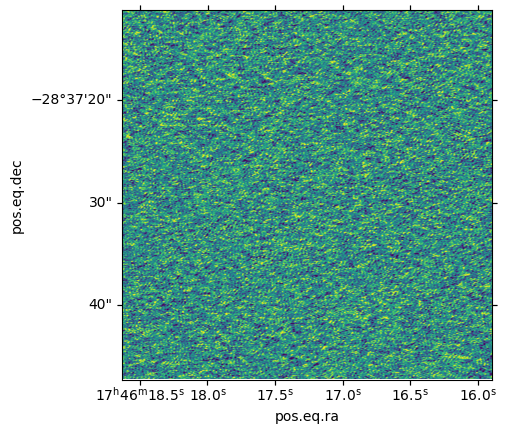

In [7]:
ax = plt.subplot(projection=cutout_filanoise.wcs)
ax.imshow(cutout_filanoise.data, origin='lower', cmap='viridis', vmin=np.nanpercentile(cutout_filanoise.data, 1), vmax=np.nanpercentile(cutout_filanoise.data, 99))

In [ ]:
#d_filament = Dendrogram.compute(hdu_filament.data[0,0], min_value=4*np.nanstd(cutout_filanoise.data), min_npix=int(mpix_filament), wcs=WCS(hdu_filament.header).celestial) 
# min_delta = 1 or 0.7 times the noise 
d_filament = Dendrogram.compute(data_filament, min_value=2.8*np.nanstd(cutout_filanoise.data), min_npix=int(mpix_filament), wcs=wcs_filament, min_delta=3*np.nanstd(cutout_filanoise.data))


In [11]:
#d_filament.save_to('/blue/adamginsburg/adamginsburg/jwst/cloudc/dustridge-cd/dendro/dendro_filament.fits')
d_filament = Dendrogram.load_from('/blue/adamginsburg/adamginsburg/jwst/cloudc/dustridge-cd/dendro/dendro_filament.fits')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [7]:
d_filament.trunk

[<Structure type=leaf idx=0>,
 <Structure type=leaf idx=1>,
 <Structure type=leaf idx=2>,
 <Structure type=leaf idx=3>,
 <Structure type=leaf idx=4>,
 <Structure type=leaf idx=5>,
 <Structure type=leaf idx=6>,
 <Structure type=leaf idx=7>]

In [8]:
p_filament = d_filament.plotter()

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/astropy/visualization/wcsaxes/core.py:248: UserWarning: The following kwargs were not used by contour: 'color'
  cset = super().contour(*args, **kwargs)


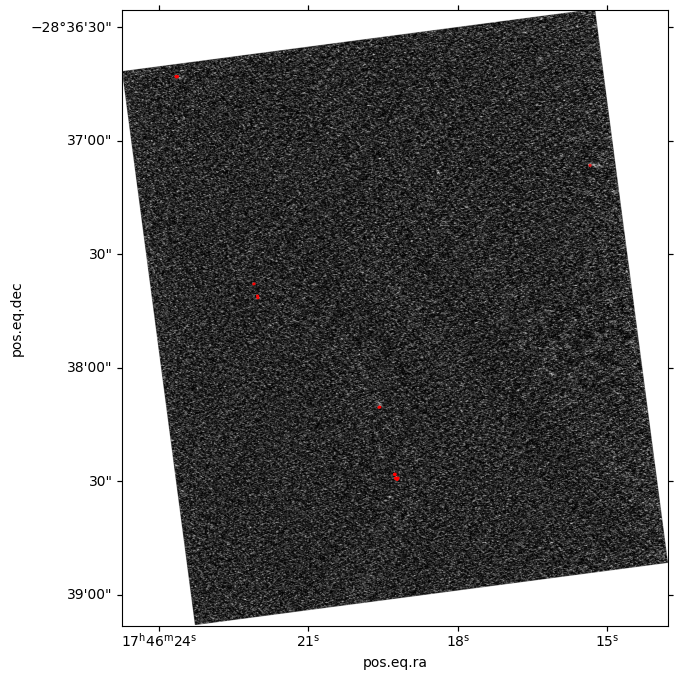

In [9]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(projection=wcs_filament)
ax.imshow(data_filament, origin='lower', cmap='gray', vmin=0, vmax=np.nanpercentile(data_filament, 99))
#ax.scatter(pos_sky.ra, pos_sky.dec, transform=ax.get_transform('world'), s=100, edgecolor='yellow', facecolor='none', lw=2)
for s in d_filament.trunk:
    p_filament.plot_contour(ax, structure=s, color='red')

In [17]:
#for s in d_filament.trunk:
#    print(s.get_peak())
#    pos = s.get_peak()
#    pos_sky = wcs_filament.pixel_to_world(pos[0][1], pos[0][0])
#    print(pos_sky)
#    cutout = Cutout2D(data_filament, pos_sky, size=(5*u.arcsec, 5*u.arcsec), wcs=wcs_filament)
#
#    ax = plt.subplot(projection=cutout.wcs)
#    ax.imshow(cutout.data, origin='lower', cmap='magma', vmin=np.nanpercentile(cutout.data, 5), vmax=np.nanpercentile(cutout.data, 95))
#    #p_filament.plot_contour(ax, structure=s, color='red', wcs=cutout.wcs)
#    plt.show()

# Statistics

In [21]:
from astrodendro.analysis import PPStatistic
from astropy.wcs.utils import proj_plane_pixel_scales
from astrodendro import Dendrogram, pp_catalog

## Filament

In [14]:
fn_filament = '/orange/adamginsburg/cmz/dustridge/filament/2024.1.00178.S/science_goal.uid___A001_X3788_X85bb/group.uid___A001_X3788_X85bc/member.uid___A001_X3788_X85bd/product/member.uid___A001_X3788_X85bd.Filament_sci.spw25_27_29_31.mfs.I.manual.image.pbcor.fits'
hdu_filament = fits.open(fn_filament)[0]

In [17]:
d_filament = Dendrogram.load_from('/blue/adamginsburg/adamginsburg/jwst/cloudc/dustridge-cd/dendro/dendro_filament.fits')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [15]:
meta_filament = {}
meta_filament['data_unit'] = u.Jy/u.beam #hdu_filament.header['BUNIT']
meta_filament['spatial_scale'] = (proj_plane_pixel_scales(WCS(hdu_filament.header).celestial)[0]*u.deg).to(u.arcsec)  # arcsec/pixel
meta_filament['beam_major'] = (hdu_filament.header['BMAJ']*u.deg).to(u.arcsec)  # arcsec
meta_filament['beam_minor'] = (hdu_filament.header['BMIN']*u.deg).to(u.arcsec)  # arcsec
meta_filament['wcs'] = WCS(hdu_filament.header).celestial

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [18]:
stat = PPStatistic(d_filament.trunk[0], metadata=meta_filament)

In [19]:
stat.flux.to(u.mJy)

<Quantity 6.98473826 mJy>

In [20]:
cat_filament = pp_catalog(d_filament, metadata=meta_filament)

Computing catalog for 8 structures

[=====>                                   ] 12%
[==========>                              ] 25%
[===============>                         ] 37%
[====================>                    ] 50%
[=========================>               ] 62%
[==============================>          ] 75%
[===================================>     ] 87%
[========================================>] 100%
[========================================>] 100%


In [23]:
cat_filament.pprint()

_idx     area_ellipse     ...       x_cen               y_cen       
           arcsec2        ...                                       
---- -------------------- ... ------------------ -------------------
   0  0.08959055326716392 ...  266.5877534850663 -28.648020391927446
   1 0.028378935711327845 ... 266.58791680408814 -28.647714381471047
   2 0.022735133666236005 ...  266.5891976768475 -28.642790351449754
   3 0.010861928089375077 ...  266.5993654979356 -28.634768011179787
   4 0.010530940138416042 ...  266.5994025289737  -28.63461775281508
   5 0.015196459922902741 ... 266.59970094299894 -28.633741764107565
   6 0.011785483840404837 ... 266.57158810138696  -28.62504398823978
   7 0.053336246946359196 ...  266.6061674600595  -28.61851784644907


In [25]:
cat_filament

_idx,area_ellipse,area_exact,flux,major_sigma,minor_sigma,position_angle,radius,x_cen,y_cen
,arcsec2,arcsec2,Jy,arcsec,arcsec,deg,arcsec,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,0.08959055326716392,0.3233999999999853,0.00698473826432166,0.18436898279776043,0.11157744783076336,173.7098200099769,0.14342740519066788,266.5877534850663,-28.648020391927446
1,0.028378935711327845,0.11269999999999489,0.0024789350827467095,0.09621724250026026,0.06772441499555619,-170.59934347481416,0.08072333281533718,266.58791680408814,-28.647714381471047
2,0.022735133666236005,0.08697499999999606,0.0018678318823964687,0.10153794820011051,0.05141279245704003,-161.5314095149621,0.07225198583655651,266.5891976768475,-28.642790351449754
3,0.010861928089375077,0.03552499999999839,0.000446929278673793,0.0792839437973591,0.03145746648746631,-159.175770283136,0.04994068486714601,266.5993654979356,-28.634768011179787
4,0.010530940138416042,0.03552499999999839,0.0004655672991243117,0.07325866455837304,0.03300731599065628,-166.7913287273913,0.04917389439663805,266.5994025289737,-28.63461775281508
5,0.015196459922902741,0.05267499999999761,0.00080842730158059,0.08149942383644937,0.0428144091407197,-155.60459258467446,0.05907071759227804,266.59970094299894,-28.633741764107565
6,0.011785483840404837,0.03919999999999822,0.0004979004624092129,0.06330139620729233,0.042750007173049366,-175.87802846213467,0.05202052615963998,266.57158810138696,-28.62504398823978
7,0.053336246946359196,0.1653749999999925,0.0026412173639817796,0.14909724071147318,0.08214004019876854,-179.00159383840364,0.11066550205717171,266.6061674600595,-28.61851784644907


## Cloud D

In [18]:
fn_cloudd = '/orange/adamginsburg/cmz/dustridge/cloudd/alma/2024.1.00178.S/science_goal.uid___A001_X3788_X85b7/group.uid___A001_X3788_X85b8/member.uid___A001_X3788_X85b9/product/member.uid___A001_X3788_X85b9.CloudD_sci.spw25_27_29_31.cont.I.manual.image.tt0.pbcor.fits'
hdu_cloudd = fits.open(fn_cloudd)[0]

In [19]:
d_cutout = Dendrogram.load_from('/blue/adamginsburg/adamginsburg/jwst/cloudc/dustridge-cd/dendro/dendro_cloudd_cutout.fits')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [22]:
meta_cloudd = {}
meta_cloudd['data_unit'] = u.Jy/u.beam #hdu_cloudd.header['BUNIT']
meta_cloudd['spatial_scale'] = (proj_plane_pixel_scales(WCS(hdu_cloudd.header).celestial)[0]*u.deg).to(u.arcsec)  # arcsec/pixel
meta_cloudd['beam_major'] = (hdu_cloudd.header['BMAJ']*u.deg).to(u.arcsec)  # arcsec
meta_cloudd['beam_minor'] = (hdu_cloudd.header['BMIN']*u.deg).to(u.arcsec)  # arcsec
meta_cloudd['wcs'] = WCS(hdu_cloudd.header).celestial

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [23]:
cat_cloudd = pp_catalog(d_cutout, metadata=meta_cloudd)

Computing catalog for 6 structures

[======>                                  ] 16%
[=============>                           ] 33%
[====================>                    ] 50%
[==========================>              ] 66%
[=================================>       ] 83%
[========================================>] 100%
[========================================>] 100%


In [24]:
cat_cloudd

_idx,area_ellipse,area_exact,flux,major_sigma,minor_sigma,position_angle,radius,x_cen,y_cen
,arcsec2,arcsec2,Jy,arcsec,arcsec,deg,arcsec,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,0.021976184932069456,0.05813599991838959,0.000779146479173818,0.11145828212776321,0.04527328630633836,177.56740761564026,0.07103578477065527,266.6152396827237,-28.567837510421825
1,0.011086309833640054,0.027039999962041667,0.00029992826857291465,0.06555939134538316,0.03882881737513421,62.853254366012294,0.05045387630078423,266.6174115223274,-28.56564560707758
2,0.012024488898545484,0.037179999947807296,0.0004609495048402377,0.05428580734267657,0.050860706546582674,166.5875795806583,0.05254535675871082,266.61818185263087,-28.563878155421047
3,0.021025779957729796,0.0567839999202875,0.0007319110998344073,0.08073995474209285,0.05979511118619372,178.38117711902416,0.06948276456051307,266.6179890226333,-28.563653791341963
4,0.06677293426411501,0.20685599970961877,0.0037009067536534325,0.14065849156869017,0.10900252790941851,109.10822661737241,0.12382298313686704,266.6179891571044,-28.563509624762602
5,0.018454722263546462,0.046643999934521875,0.0005405439433464912,0.10705523232698043,0.039582359571141534,61.72728448860578,0.06509607284574573,266.6181208983007,-28.56269146231591


In [54]:
np.nanstd(cutout_cloudd_noise.data)

8.594152e-05